# 探索数据集 - 未前往就诊的挂号预约

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

数据集包含10万条巴西预约挂号的求诊信息，研究病人是否如约前往医院就诊。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 数据整理
### 常规属性

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.sample(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
98289,5.463387e+12,5744293,F,2016-05-30T10:04:37Z,2016-06-01T00:00:00Z,17,JABOUR,0,0,0,0,0,0,No
30833,9.134486e+11,5746753,F,2016-05-30T14:29:31Z,2016-05-30T00:00:00Z,29,SANTA CLARA,0,0,0,0,0,0,No
44108,3.613194e+13,5593938,M,2016-04-18T10:01:41Z,2016-05-10T00:00:00Z,1,SÃO JOSÉ,0,0,0,0,0,1,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### 研究这个数据包主要为了探究未前往就诊的患者情况
#### 数据包中信息包括患者ID，性别，患者年龄，医院所在地区，预约ID，预约时间，约定时间，患者是否参与家庭支持计划，是否收到预约成功短信，患者病症，是否前往就诊等信息。

##### Q1：患者是否收到短信通知对失约率有无影响？
##### Q2：患者年龄对失约率有无影响？
##### Q3：患者是否参加福利项目，对失约率有无影响？
##### Q4：患者是否酗酒，对失约率有无影响？
##### Q5：患者的性别，对失约率有无影响？



### 数据清理

In [4]:
# 整理列名
df.rename(columns=lambda x: x.lower(), inplace=True)

In [5]:
# 整理列名
df.rename(columns={'no-show':'no_show'}, inplace=True)

In [6]:
# 整理no_show列内容用"1,0"表示
df['no_show'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [7]:
# 将ID列类型改为字符串
df['patientid'] = df['patientid'].astype(str, inplace=True)

In [8]:
# 将ID列类型改为字符串
df['appointmentid'] = df['appointmentid'].astype(str, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null object
appointmentid     110527 non-null object
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null int64
dtypes: int64(8), object(6)
memory usage: 11.8+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
# 为年龄分组，未成年人0-18岁，成年人18-45岁，中年人45-70岁，老年人70岁以上
age_labels = ['Minor', 'Adult', 'Middle-aged', 'Elder']
df = df.copy()
df.insert(6, 'age_cut',pd.cut(df['age'],bins=[-1,18,45,70,150],labels=age_labels))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
patientid         110527 non-null object
appointmentid     110527 non-null object
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
age_cut           110526 non-null category
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null int64
dtypes: category(1), int64(8), object(6)
memory usage: 11.9+ MB


In [13]:
df[df.isnull().values==True]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,age_cut,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,465943158731293.0,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,NaN,ROMÃO,0,0,0,0,0,0,0


In [14]:
#剔除年龄为-1的数据
df.drop([99832], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
patientid         110526 non-null object
appointmentid     110526 non-null object
gender            110526 non-null object
scheduledday      110526 non-null object
appointmentday    110526 non-null object
age               110526 non-null int64
age_cut           110526 non-null category
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hipertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handcap           110526 non-null int64
sms_received      110526 non-null int64
no_show           110526 non-null int64
dtypes: category(1), int64(8), object(6)
memory usage: 12.8+ MB


In [16]:
df[df['no_show']==1].shape

(22319, 15)

数据表中共计录入110527条数据，其中1条数据因年龄填写为-1被判为无效数据，

共计有效数据110526条，未就诊预约共计22319条，总失约率约为20.2%。

<a id='eda'></a>
## 探索性数据分析

### Q1：患者是否收到短信通知对失约率有无影响？

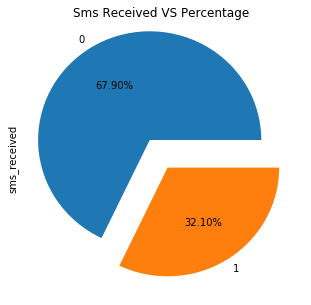

In [17]:
df['sms_received'].value_counts().plot.pie(explode=[0.2,0.1],autopct='%.2f%%', figsize=(5, 5))
plt.title('Sms Received VS Percentage');

数据显示收到短信的患者约占32.1%，未收到短信的患者约占67.9%。

In [18]:
sms_rate = df.groupby('sms_received')['no_show'].mean()
print(sms_rate)

sms_received
0    0.167035
1    0.275745
Name: no_show, dtype: float64


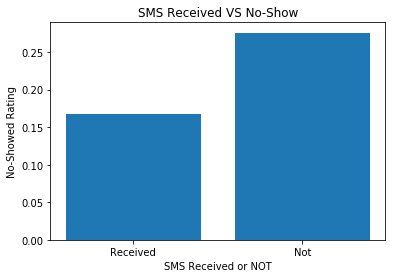

In [19]:
locations = [1, 2]
heights = [sms_rate[0], sms_rate[1]]
labels = ['Received', 'Not']
plt.bar(locations, heights, tick_label=labels)
plt.title('SMS Received VS No-Show')
plt.xlabel('SMS Received or NOT')
plt.ylabel('No-Showed Rating');

收到短信的患者失约率约为16.7%，未收到短信的患者失约率约为27.6%，相较而言未收到短信的患者失约率更高。

### Q2：患者年龄对失约率有无影响？

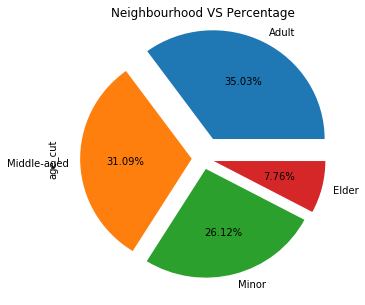

In [20]:
df['age_cut'].value_counts().plot.pie(explode=[0.2,0.1,0.1,0.1],autopct='%.2f%%', figsize=(5, 5))
plt.title('Neighbourhood VS Percentage');

数据显示未成年患者约占26.12%，成年患者约占35.03%，中年患者约占31.09%，老年患者约占7.76%。

In [21]:
age_rate = df.groupby('age_cut')['no_show'].mean()
print(age_rate)

age_cut
Minor          0.219878
Adult          0.228183
Middle-aged    0.168151
Elder          0.158404
Name: no_show, dtype: float64


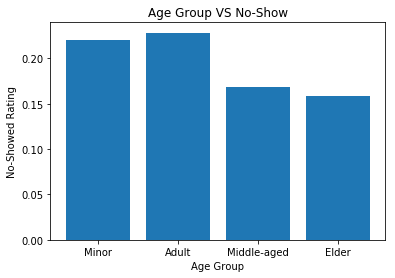

In [22]:
locations = [1, 2, 3, 4]
heights = [age_rate[0], age_rate[1], age_rate[2], age_rate[3]]
labels = ['Minor', 'Adult', 'Middle-aged', 'Elder']
plt.bar(locations, heights, tick_label=labels)
plt.title('Age Group VS No-Show')
plt.xlabel('Age Group')
plt.ylabel('No-Showed Rating');

未成年人组失约率约22.0%，成年人约22.8%，中年人和老年人相对较低，分别约为16.8%和15.8%。相较而言中年以下年龄段的患者失约率更高。

### Q3：患者是否参加福利项目，对失约率有无影响？

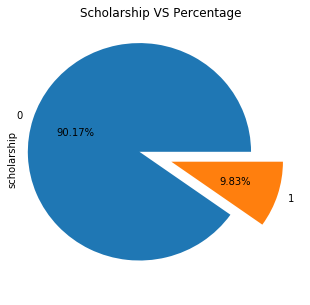

In [23]:
df['scholarship'].value_counts().plot.pie(explode=[0.2,0.1],autopct='%.2f%%', figsize=(5, 5))
plt.title('Scholarship VS Percentage');

数据显示参加福利项目的患者约占9.83%，未参加福利项目的患者约占90.17%。

In [24]:
sch_rate = df.groupby('scholarship')['no_show'].mean()
print(sch_rate)

scholarship
0    0.198074
1    0.237363
Name: no_show, dtype: float64


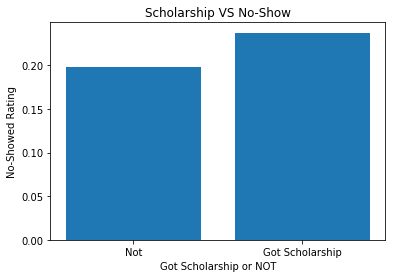

In [25]:
locations = [1, 2]
heights = [sch_rate[0], sch_rate[1]]
labels = ['Not', 'Got Scholarship']
plt.bar(locations, heights, tick_label=labels)
plt.title('Scholarship VS No-Show')
plt.xlabel('Got Scholarship or NOT')
plt.ylabel('No-Showed Rating');

未参加家庭支持计划的患者失约率约为19.8%，参加家庭支持计划的患者失约率约为23.7%，相较而言参加家庭支持计划的患者失约率更高。

### Q4：患者是否酗酒，对失约率有无影响？

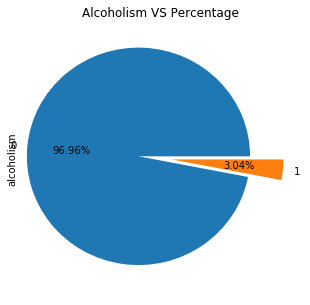

In [26]:
df['alcoholism'].value_counts().plot.pie(explode=[0.2,0.1],autopct='%.2f%%', figsize=(5, 5))
plt.title('Alcoholism VS Percentage');

数据显示酗酒的患者约占3.04%，无酗酒习惯的患者约占96.96%。

In [27]:
alc_rate = df.groupby('alcoholism')['no_show'].mean()
print(alc_rate)

alcoholism
0    0.201948
1    0.201488
Name: no_show, dtype: float64


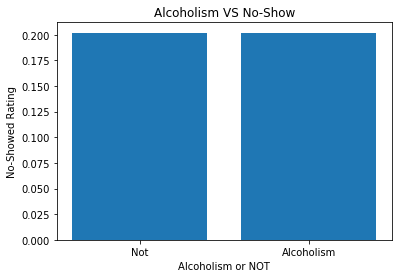

In [28]:
locations = [1, 2]
heights = [alc_rate[0], alc_rate[1]]
labels = ['Not', 'Alcoholism']
plt.bar(locations, heights, tick_label=labels)
plt.title('Alcoholism VS No-Show')
plt.xlabel('Alcoholism or NOT')
plt.ylabel('No-Showed Rating');

无酗酒习惯患者失约率约为20.2%，酗酒患者失约率约为20.1%，两者相差不大，说明酗酒与否与是否如约就诊无太大关联。

### Q5：患者的性别，对失约率有无影响？

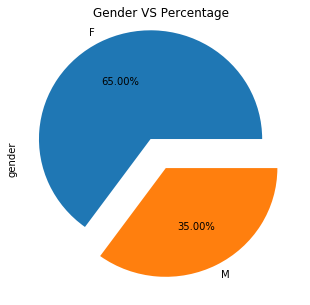

In [29]:
df['gender'].value_counts().plot.pie(explode=[0.2,0.1],autopct='%.2f%%', figsize=(5, 5))
plt.title('Gender VS Percentage');

数据显示男性患者约占35%，女性患者约占65%。

In [30]:
gen_rate = df.groupby('gender')['no_show'].mean()
print(gen_rate)

gender
F    0.203149
M    0.199679
Name: no_show, dtype: float64


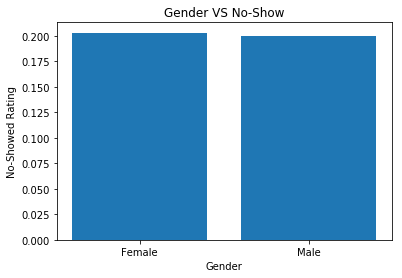

In [31]:
locations = [1, 2]
heights = [gen_rate[0], gen_rate[1]]
labels = ['Female', 'Male']
plt.bar(locations, heights, tick_label=labels)
plt.title('Gender VS No-Show')
plt.xlabel('Gender')
plt.ylabel('No-Showed Rating');

女性患者失约率约为20.3%，男性患者失约率约为20.0%，两者相差不大，说明性别与是否如约就诊无太大关联。

### 其他探索

In [32]:
df.corr()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
no_show,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000


##### 发现：年龄与是否患有高血压有较强正相关关系，而是否患有高血压与是否患有糖尿病也有较强正相关关系。

<a id='conclusions'></a>
## 结论
### 提升短信通知覆盖率或能提高患者就诊率
#### 1：未收到短信的患者失约率相对较高
#### 2：40岁以下的患者失约率相对较高
#### 3：参加福利项目的患者失约率相对较高
#### 4：是否酗酒对于患者失约无显著影响
#### 5：性别对患者失约无显著影响

##### 局限性：大多数数据是按照“1或0”来标识“是或否”的，如原始数据有误不易被排查出来。

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295